In [127]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
import numpy as np

In [58]:
df = pd.read_csv(r"Downloads\student_alcohol_consumption\student-alcohol-consumption.csv")

In [59]:
df.head(5)

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


In [60]:
# find thhe diamension of the dataset

df.shape

(395, 30)

In [65]:
df.dtypes

Unnamed: 0     int64
school        object
sex           object
age            int64
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
traveltime     int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
location      object
study_time    object
dtype: object

### Data Cleaning

In [67]:
# Dropping irrelevant columns
df = df.drop(columns =['Unnamed: 0','school','famsize','Pstatus','Medu','Fedu','traveltime','failures','nursery','higher','internet'],axis=1)
df.shape 
df.head(5)

,sex,age,schoolsup,famsup,paid,activities,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,F,18,yes,no,no,no,no,4,3,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,F,17,no,yes,no,no,no,5,3,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,F,15,yes,no,yes,no,no,4,3,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,F,15,no,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,F,16,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


In [68]:
df.columns

Index(['sex', 'age', 'schoolsup', 'famsup', 'paid', 'activities', 'romantic',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'location', 'study_time'],
      dtype='object')

In [69]:
df.shape

(395, 19)

In [71]:
df.describe()

,age,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [74]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows: ",duplicate_rows_df.shape)

Number of duplicated rows:  (0, 19)


In [75]:
df.count()

sex           395
age           395
schoolsup     395
famsup        395
paid          395
activities    395
romantic      395
famrel        395
freetime      395
goout         395
Dalc          395
Walc          395
health        395
absences      395
G1            395
G2            395
G3            395
location      395
study_time    395
dtype: int64

In [76]:
# finding Null values
df.isnull().sum()

sex           0
age           0
schoolsup     0
famsup        0
paid          0
activities    0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
location      0
study_time    0
dtype: int64

<AxesSubplot:xlabel='Dalc'>

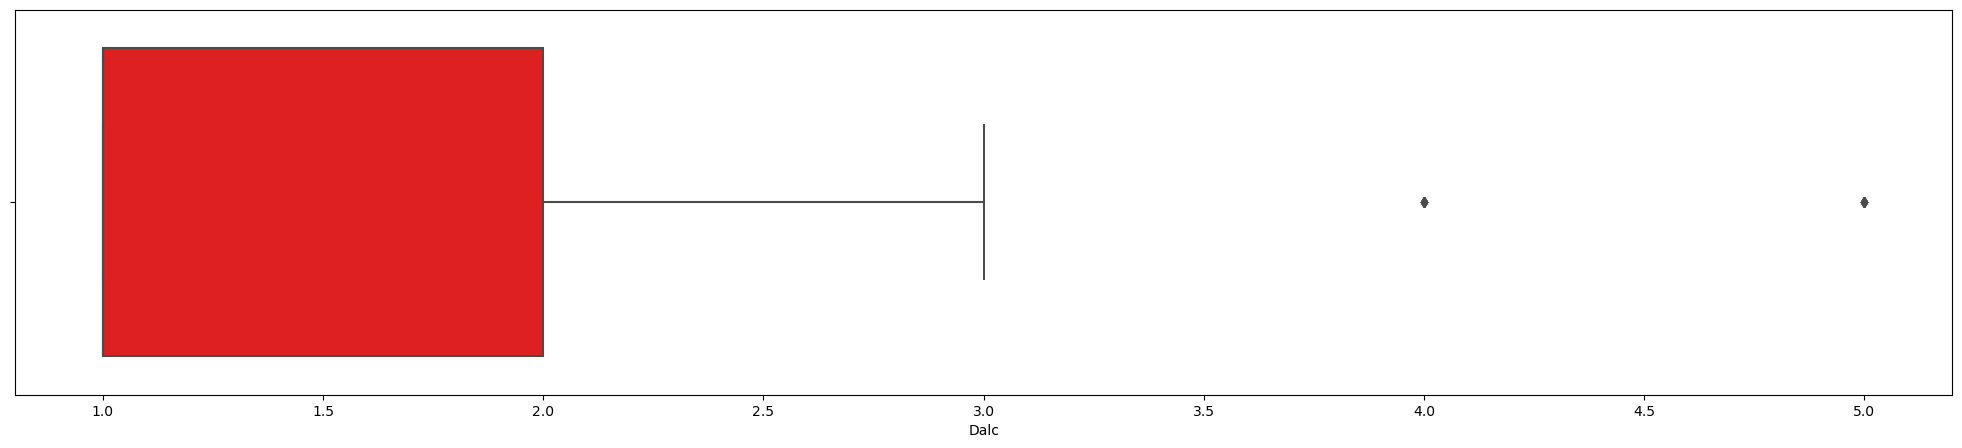

In [81]:
# Ploting Box Plot to find outliers
#plot for Dalc variable

plt.figure(figsize=(25,5))
sns.boxplot(x=df['Dalc'],color='red')

<AxesSubplot:xlabel='Walc'>

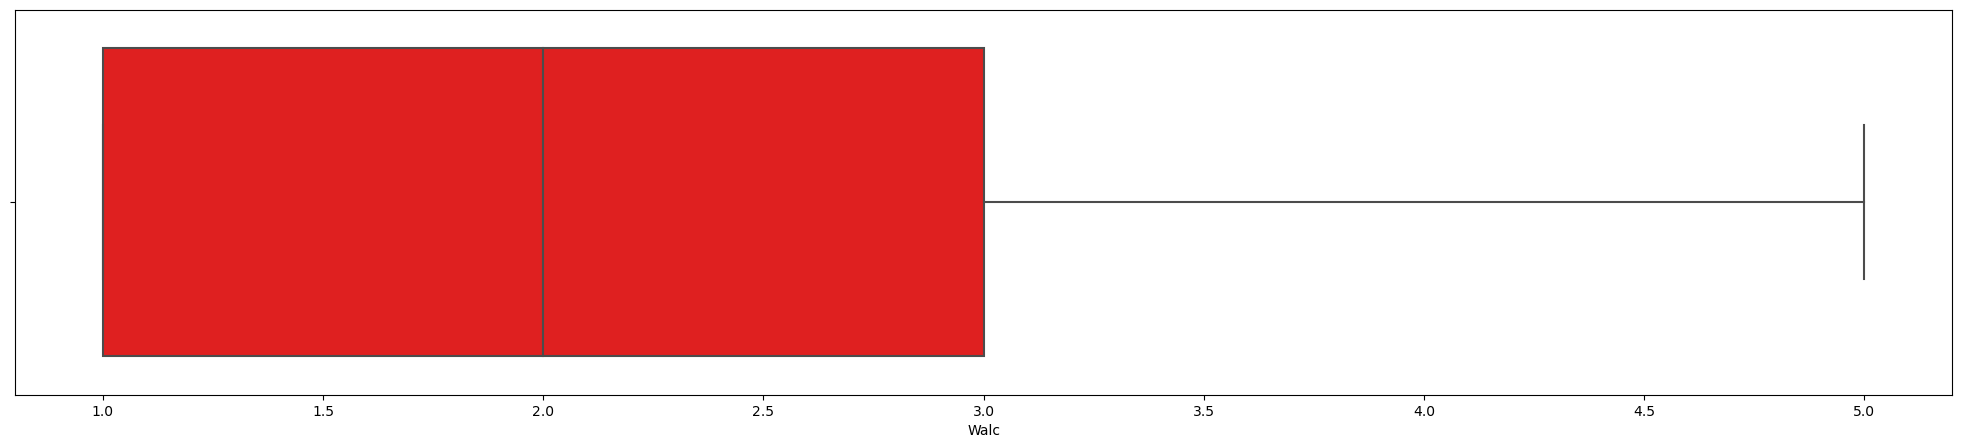

In [84]:
# Ploting Box Plot to find outliers
#plot for Walc variable

plt.figure(figsize=(25,5))
sns.boxplot(x=df['Walc'],color='red')

In [90]:
print("First Quartile Q1=",df['goout'].quantile(0.25))
print("Second Quartil/Median Q2=",df['goout'].median())
print("Third Quartile Q3=",df['goout'].quantile(0.75))

First Quartile Q1= 2.0
Second Quartil/Median Q2= 3.0
Third Quartile Q3= 4.0


In [110]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
print(IQR)

age         2.0
famrel      1.0
freetime    1.0
goout       2.0
Dalc        1.0
Walc        2.0
health      2.0
absences    8.0
G1          5.0
G2          4.0
G3          6.0
dtype: float64


In [111]:
lower_fence = q1-(1.5 * IQR)
lower_fence

age         13.0
famrel       2.5
freetime     1.5
goout       -1.0
Dalc        -0.5
Walc        -2.0
health       0.0
absences   -12.0
G1           0.5
G2           3.0
G3          -1.0
dtype: float64

In [112]:
higher_fence = q3+(1.5 * IQR)
higher_fence

age         21.0
famrel       6.5
freetime     5.5
goout        7.0
Dalc         3.5
Walc         6.0
health       8.0
absences    20.0
G1          20.5
G2          19.0
G3          23.0
dtype: float64

In [120]:
print("\nIQR=\n, IQR")
outliers = df[~((df<lower_fence) | (df>higher_fence)).any(axis=1)]
outliers.head(5)
outliers.shape


IQR=
, IQR


(311, 19)

### Data Visualization

#### 1. Which sex indulges more in alcoholism?

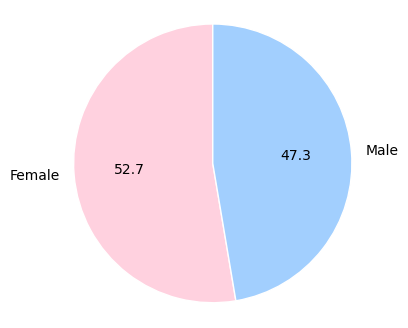

In [154]:
plt.figure(figsize=(4,4))
plt.pie(df['sex'].value_counts().tolist(),colors=['#ffd1df', '#a2cffe'],
       labels=['Female','Male'],autopct='%1.1f',startangle=90,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
axis=plt.axis("equal")

#### 2. What is the age group which is most affected?

<AxesSubplot:xlabel='age'>

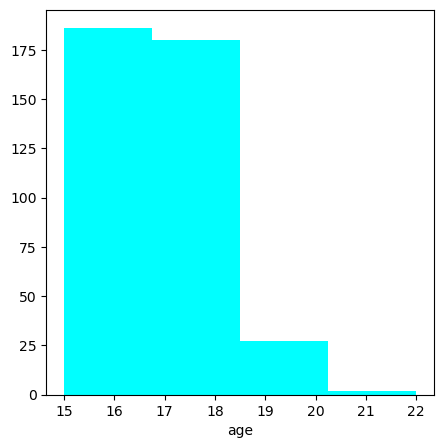

In [173]:
plt.figure(figsize=(5,5))
sns.distplot(df['age'],  
             hist_kws={"alpha": 1, "color": "cyan"},
             kde=False, bins=4)

<AxesSubplot:xlabel='age', ylabel='Dalc'>

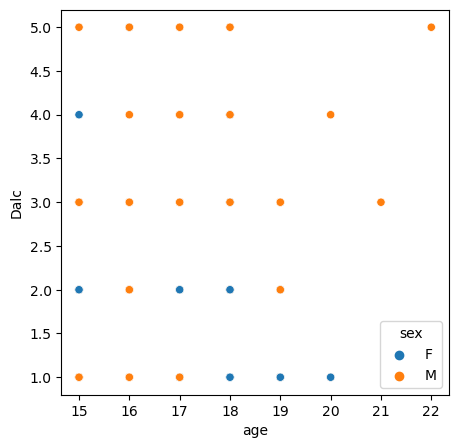

In [175]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['age'],y=df['Dalc'],hue=df['sex'])

#### 3. How does alcohol consumption affect the total grade of students?

In [176]:
df['Dalc']=df['Dalc'] + df['Walc']

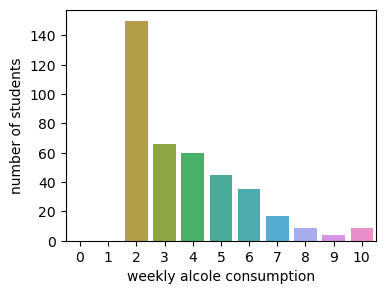

In [189]:
# There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.
list = []
for i in range(11):
    list.append(len(df[df.Dalc==i]))
    
plt.figure(figsize=(4,3))
ax=sns.barplot(x=[0,1,2,3,4,5,6,7,8,9,10],y=list)
plt.xlabel("weekly alcole consumption")
plt.ylabel("number of students")
plt.show()

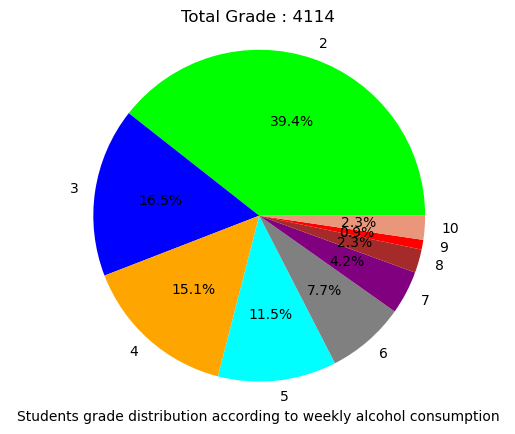

In [193]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']

sizes = []

for i in range (2,11):
    sizes.append(sum(df[df.Dalc == i].G3))
total_grade = sum(sizes)
average = total_grade/float(len(df))

plt.pie(sizes,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Total Grade : "+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')
plt.show()

In [198]:
sum(df['G1'])

4309

<AxesSubplot:xlabel='Walc', ylabel='G1'>

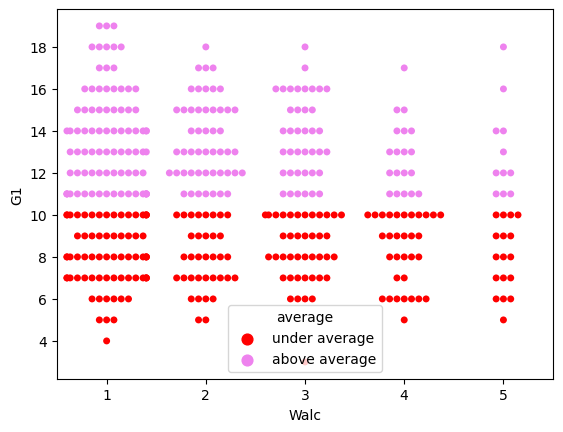

In [202]:
ave = sum(df.G1)/float(len(df))
df['ave_line'] = ave
df['average'] = ['above average' if i > ave else 'under average' for i in df.G1]

'''
for i in df.G1:
    if i > avg:
        print('above average')
    else:
        print('under average')
'''

sns.swarmplot(x='Walc',y='G1',hue = 'average', data = df, palette={'above average':'violet','under average':'red'})

<AxesSubplot:xlabel='Walc', ylabel='G1'>

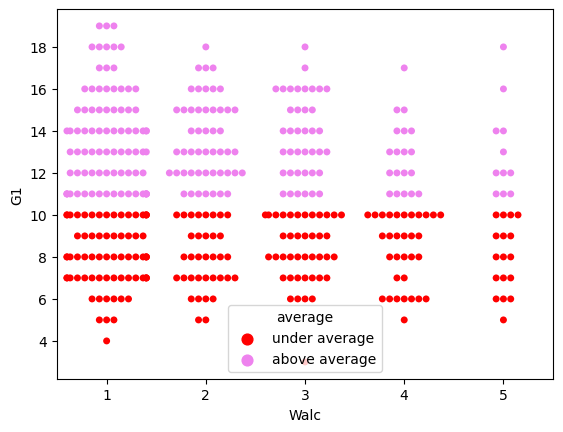

In [201]:
ave = sum(df.G1)/float(len(df))
df['ave_line'] = ave
df['average'] = ['above average' if i > ave else 'under average' for i in df.G1]
sns.swarmplot(x='Walc', y = 'G1', hue = 'average',data= df,palette={'above average':'violet', 'under average': 'red'})

####  4. What is the relationship between G1 and G2 ?

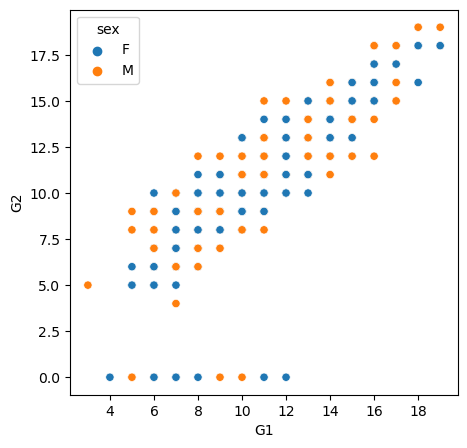

In [207]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['G1'],y=df['G2'],hue = df['sex'])
plt.show()

#### 5. What relation between G2 and G3 ?

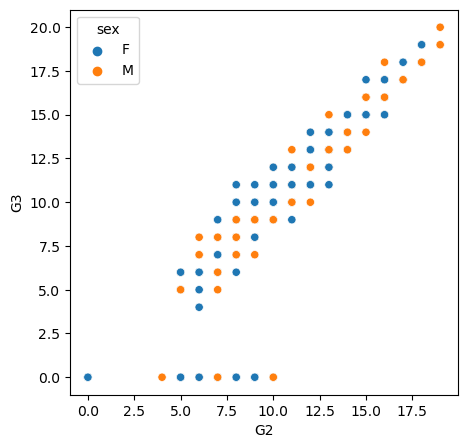

In [209]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=df['G2'],y=df['G3'],hue = df['sex'])
plt.show()

#### 6. What is the affect of romantic relationships on grades of a student?

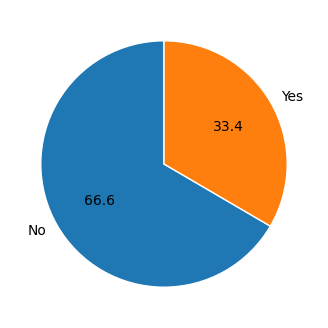

In [212]:
plt.figure(figsize=(4,4))
plt.pie(df['romantic'].value_counts().tolist(),
       labels=['No','Yes'],autopct='%1.1f',startangle=90,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.show()

Text(0.5, 1.0, 'Distribution of absences for classes by people in love')

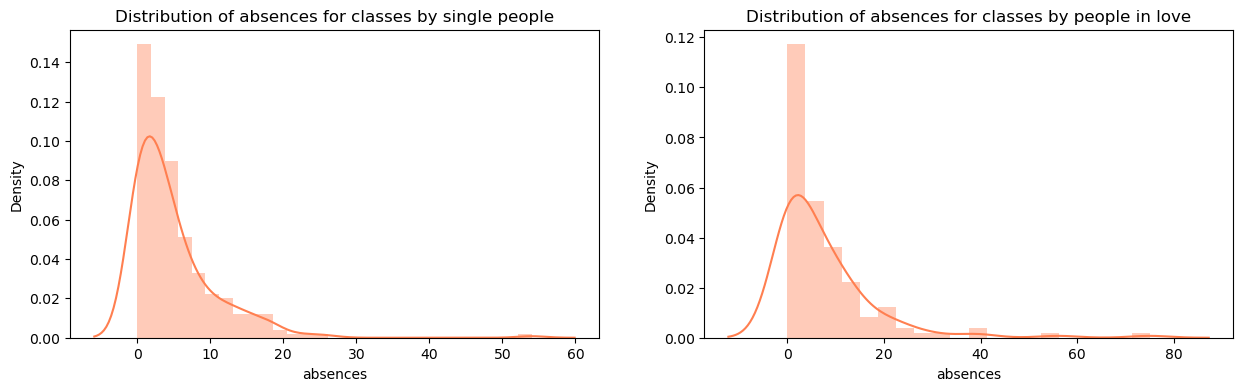

In [221]:
f = plt.figure(figsize=(15,4))

f.add_subplot(121)
sns.distplot(df[(df.romantic=='no')]['absences'],color='coral')
plt.title('Distribution of absences for classes by single people')

f.add_subplot(122)
sns.distplot(df[(df.romantic=='yes')]['absences'],color='coral')
plt.title('Distribution of absences for classes by people in love')

Text(0.5, 1.0, 'Distribution of absences for classes by people in love')

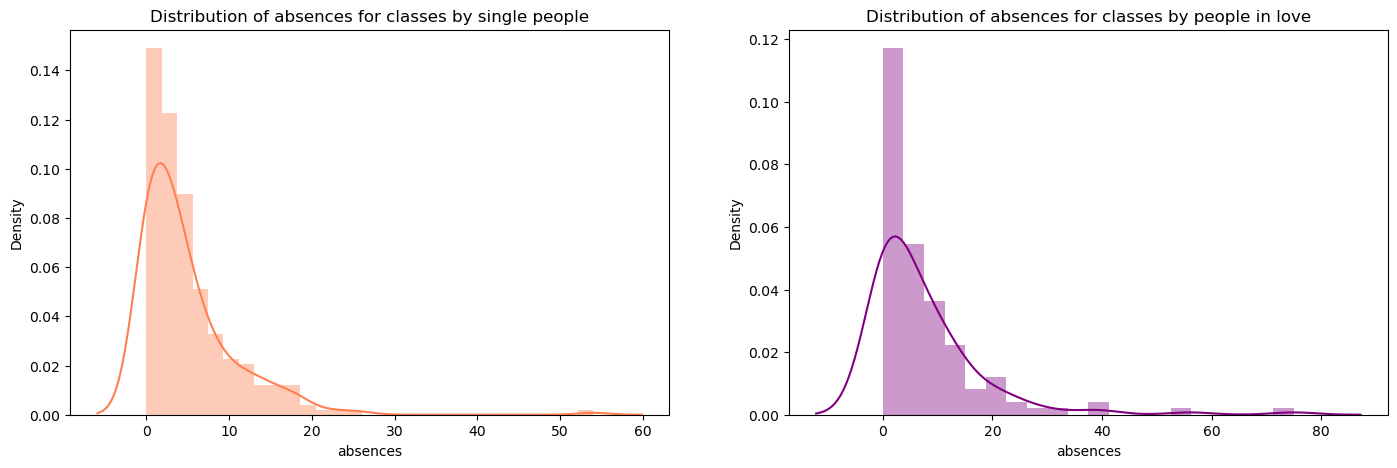

In [213]:
f= plt.figure(figsize=(17,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.romantic == 'no')]["absences"],color='coral',ax=ax)
ax.set_title('Distribution of absences for classes by single people')

ax=f.add_subplot(122)
sns.distplot(df[(df.romantic == 'yes')]['absences'],color='purple',ax=ax)
ax.set_title('Distribution of absences for classes by people in love')

#### 7. How do the students spend their time ?

In [234]:
df['Dalc'] = df['Dalc']+df['Walc']

<AxesSubplot:xlabel='study_time', ylabel='Dalc'>

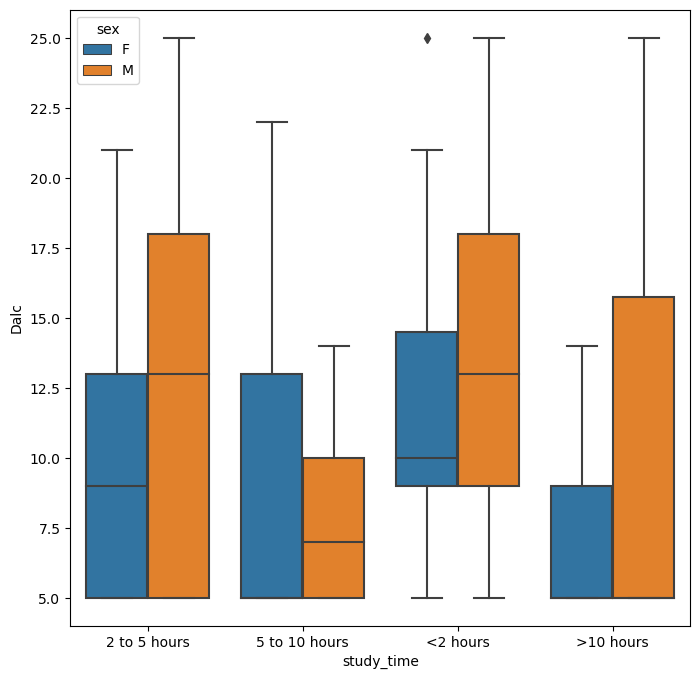

In [238]:
plt.figure(figsize=(8,8))
sns.boxplot(y='Dalc',x='study_time',data =df,hue='sex')

<AxesSubplot:xlabel='Dalc', ylabel='goout'>

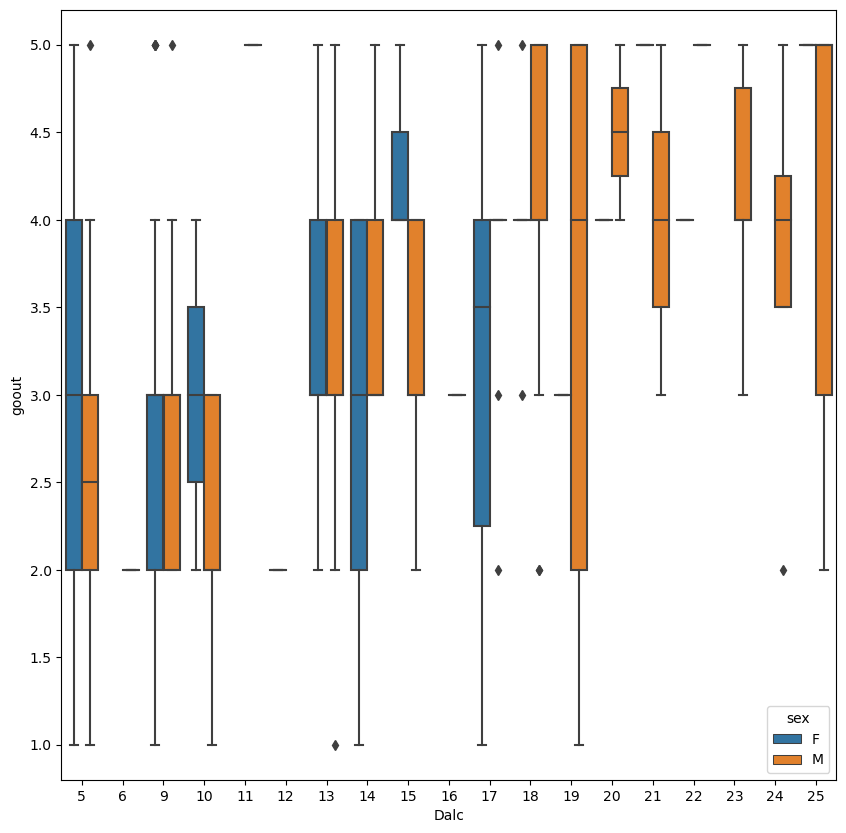

In [244]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Dalc',y='goout',data =df,hue='sex')

#### 8. How does the weekly alcohol consumption affect the health of the students?

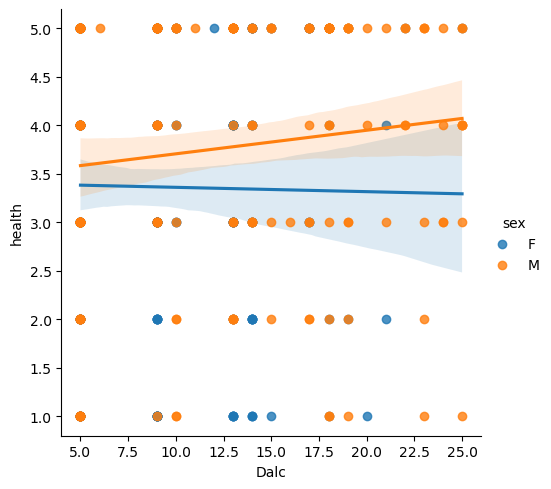

In [251]:
sns.lmplot(x='Dalc',y='health',hue='sex',data=df)

#### 9. How is the student's family relationship quality ?

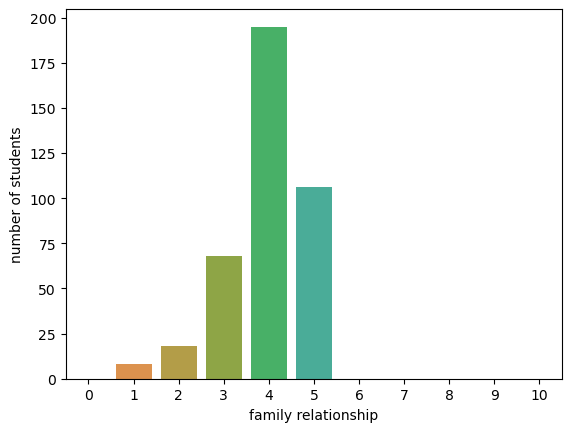

In [255]:
list=[]
for i in range(11):
    list.append(len(df[df.famrel==i]))
sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('number of students')
plt.xlabel('family relationship')
plt.show()

<AxesSubplot:xlabel='Dalc', ylabel='famrel'>

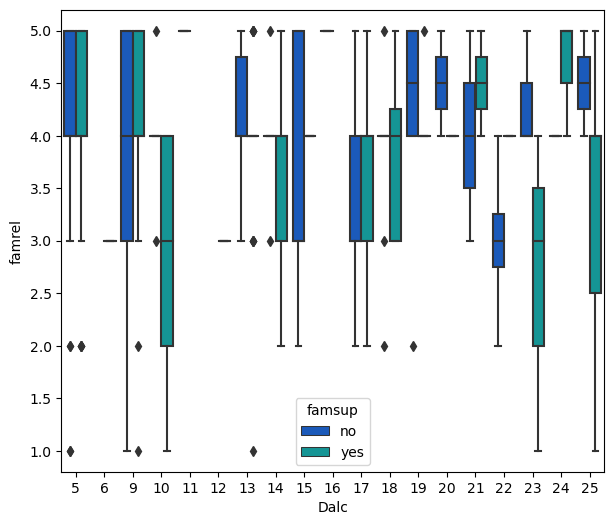

In [259]:
plt.figure(figsize=(7,6))
sns.boxplot(x='Dalc',y='famrel',data =df,hue='famsup',palette='winter')

#### 10. What distribution of students attend extra paid classes?

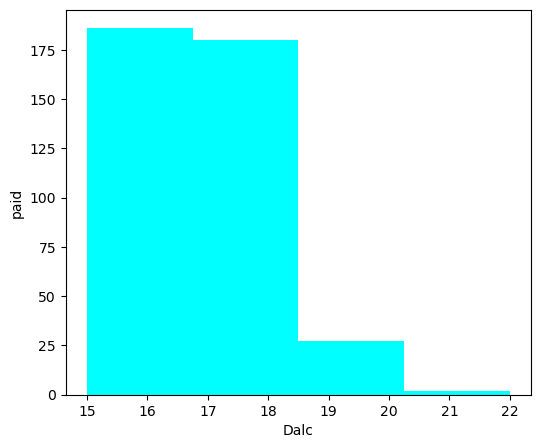

In [270]:
fig, ax=plt.subplots(figsize=(6,5))
sns.distplot(df['age'],
            hist_kws={"alpha": 1, "color": "cyan"}, 
             kde=False, bins=4)
ax=ax.set(ylabel="paid", xlabel="Dalc")
plt.show()

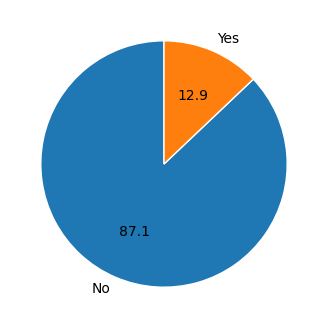

In [272]:
plt.figure(figsize=(4,4))
plt.pie(df['schoolsup'].value_counts().tolist(),
       labels=['No','Yes'],autopct='%1.1f',startangle=90,wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.show()